<a href="https://colab.research.google.com/github/wbandabarragan/ISYA2025/blob/main/Python_for_Astrophysics/3_tutorial_py4astro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# N-dimensional Plotting

In this lecture we will revise some of the main plotting packages with a guided astrophysical example of a self-gravitating parcel of gas.

The packages are:

- Matpotlib (https://matplotlib.org)
- Plotly (https://plotly.com)
- YT (https://yt-project.org)


## 1. Matplotlib: 1D density profile of Isothermal Self-Gravitating Gas Slab


We start from the system of equations describing hydrostatic equilibrium and self-gravity in 1D (vertical direction $z$):

#### Poisson Equation:
$$\frac{d^2 \Phi}{dz^2} = 4\pi G \rho(z)$$

#### Hydrostatic Equilibrium:
$$\frac{dP}{dz} = -\rho(z) \frac{d\Phi}{dz}$$

#### Isothermal Equation of State:
$$P = \rho c_s^2$$

#### Solution to the above equations:

The density profile is:

$$\rho(z) = \rho_0 \, \text{sech}^2 \left( \frac{z}{H} \right)$$

where: $H = \frac{c_s}{\sqrt{2\pi G \rho_0}}$

This describes the vertical equilibrium of a self-gravitating, isothermal slab.

Some examples include:

- The mid-plane of a galactic disc.
  
- A dense molecular sheet in the the interstellar medium (ISM).

- Gas layers in the interstellar medium (ISM).

#### Reference: https://ui.adsabs.harvard.edu/abs/1942ApJ....95..329S

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Scipy constants
import scipy.constants as const

In [2]:
G = const.G * 1e6 * 1e-3 # gravitational constant in cgs

In [3]:
cs = 2e4        # sound speed in cm/s (~0.2 km/s typical for cold ISM)
rho0 = 1e-18    # central density in g/cm^3 (typical dense molecular cloud)


In [4]:
# Scale height
H = cs / np.sqrt(2 * np.pi * G * rho0)

# z range (from -4H to 4H)
z = np.linspace(-4*H, 4*H, 500)
rho = rho0 * (1 / np.cosh(z / H))**2

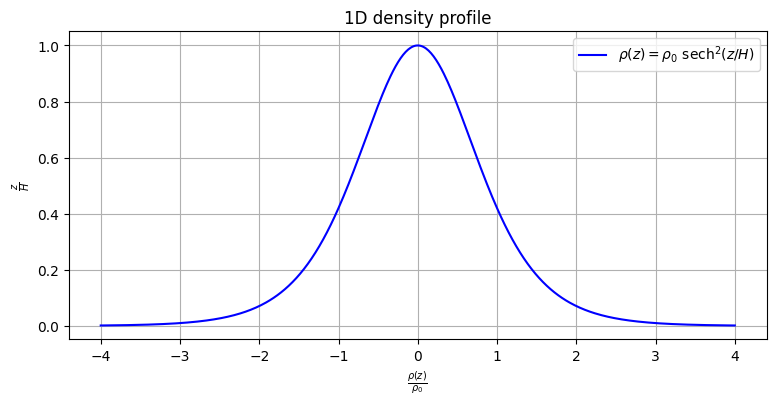

In [5]:
# Plotting
plt.figure(figsize=(9, 4))

plt.plot(z / H, rho / rho0, color='blue', label=r'$\rho(z) = \rho_0 \ \mathrm{sech}^2(z/H)$')

plt.xlabel(r'$\frac{\rho(z)}{\rho_0}$')
plt.ylabel(r'$\frac{z}{H}$')

plt.title("1D density profile")
plt.grid(True)

plt.legend(loc=1)

plt.show()

### Export figure in GDrive



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Navigate to your desired Google Drive folder (create if it doesn't exist)
%cd /content/drive/MyDrive/ISYA2025/

/content/drive/MyDrive/ISYA2025


In [8]:
!mkdir -p images

!ls -ltr

total 485
drwx------ 2 root root   4096 Jul  8 17:56 python_scripts
drwx------ 2 root root   4096 Jul  8 19:31 obsolete
-rw------- 1 root root  23978 Jul  8 20:39 1_tutorial_py4astro.ipynb
-rw------- 1 root root 226833 Jul  8 21:14 2_tutorial_py4astro.ipynb
drwx------ 2 root root   4096 Jul  9 17:14 images
-rw------- 1 root root    140 Jul  9 17:27 test_file.txt
-rw------- 1 root root    184 Jul  9 17:27 test_file.csv
-rw------- 1 root root 231616 Jul  9 17:49 3_tutorial_py4astro.ipynb


### Vectorial formats:

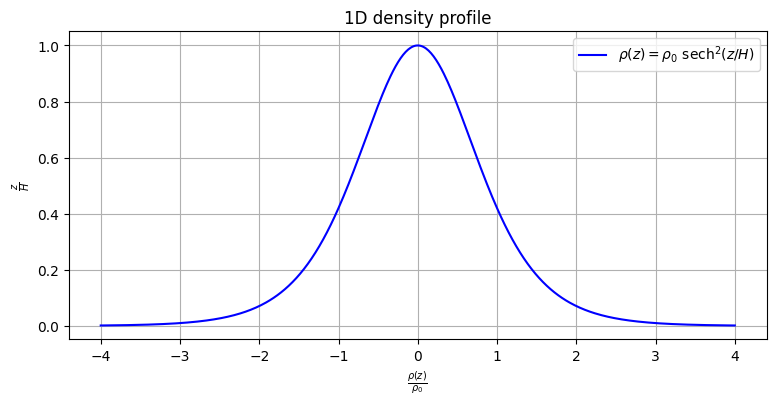

In [9]:
# Plotting
plt.figure(figsize=(9, 4))

plt.plot(z / H, rho / rho0, color='blue', label=r'$\rho(z) = \rho_0 \ \mathrm{sech}^2(z/H)$')

plt.xlabel(r'$\frac{\rho(z)}{\rho_0}$')
plt.ylabel(r'$\frac{z}{H}$')

plt.title("1D density profile")
plt.grid(True)

plt.legend(loc=1)

#plt.show()

plt.savefig("./images/1d_density.eps")

## 2. Matplotlib: 2D density profile of Isothermal Self-Gravitating Gas Slab (Cylindrical Symmetry)

In 2D cylindrical symmetry (e.g., interstellar filaments), the equilibrium density profile is:

$$\rho(r) = \frac{\rho_0}{\left(1 + \frac{r^2}{8 H^2} \right)^2}$$

Where:

- $\rho(r)$ is the gas density as a function of cylindrical radius $r$,
- $\rho_0$ is the central density,
- $H = \frac{c_s}{\sqrt{4\pi G \rho0}}$ is the scale height (depends on sound speed $c_s$ and gravity $G$).

#### Reference: https://ui.adsabs.harvard.edu/abs/1964ApJ...140.1056O

In [10]:
# 2D Scale height
H = cs / np.sqrt(4 * np.pi * G * rho0)

# 2D grid setup
Rmax = 3 * H
N = 600

In [11]:
# Meshgrid creation
x = np.linspace(-Rmax, Rmax, N)
y = np.linspace(-Rmax, Rmax, N)

#print(x.shape)

x_2d, y_2d = np.meshgrid(x, y)
#print(x_2d.shape)

# radial coordinate
R = np.sqrt(x_2d**2 + y_2d**2)

# Ostriker solution for 2D filament
rho = rho0 / (1 + R**2 / (8 * H**2))**2
#print(rho.shape)

# Normalize for plotting
rho_norm = rho / np.max(rho)

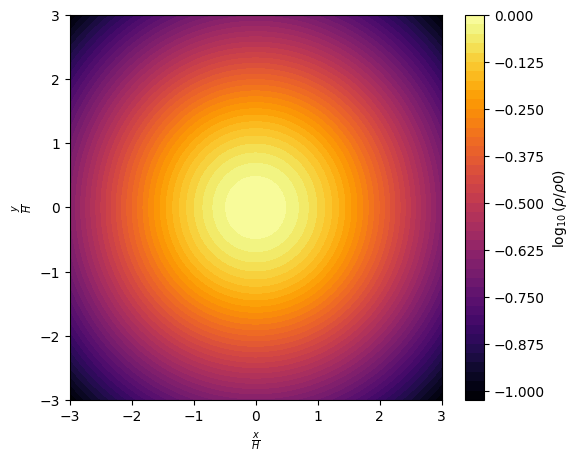

In [12]:
# Plot
plt.figure(figsize=(6, 5))

plt.contourf(x_2d/H, y_2d/H, np.log10(rho_norm), levels=50, cmap='inferno')

cbar = plt.colorbar(label=r'$\log_{10}(\rho / \rho0)$')

plt.xlabel(r'$\frac{x}{H}$')
plt.ylabel(r'$\frac{y}{H}$')


plt.show()


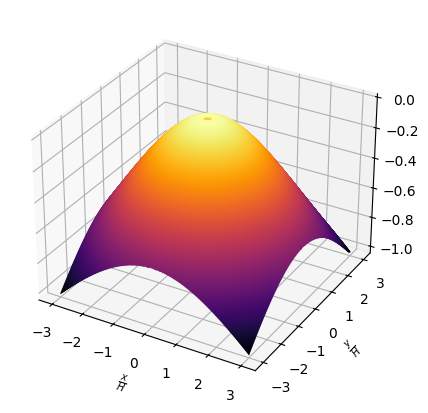

In [13]:
# Plot
plt.figure(figsize=(6, 5))

#plt.contourf(x_2d/H, y_2d/H, np.log10(rho_norm), levels=50, cmap='inferno')

ax = plt.axes(projection = "3d")

ax.contour3D(x_2d/H, y_2d/H, np.log10(rho_norm), 500,  cmap='inferno')

#cbar = plt.colorbar(label=r'$\log_{10}(\rho / \rho0)$')

plt.xlabel(r'$\frac{x}{H}$')
plt.ylabel(r'$\frac{y}{H}$')

plt.savefig("./images/2d_density.png")


## 3. Plotly: 3D interactive plotting

- Plotly is an open-source graphing library used to create interactive visualisations directly in web browsers.

- It can be integrated with jupyter notebookssupports.

- Plotly is highly versatile, with APIs available in Python, R, JavaScript.

#### Website: https://plotly.com

### Example: 3D spherical profile of Isothermal Self-Gravitating Slab (approximation)

A commonly used analytic approximation to the solution of the isothermal Lane-Emden equation in 3D is given by the **modified Hubble profile**:

$$
\rho(r) = \frac{\rho_0}{\left(1 + \frac{r^2}{r_c^2} \right)^{3/2}}
$$

This expression provides a good approximation (within 7% accuracy) to the numerical isothermal sphere solution for $r \lesssim 4 r_c$, where $\rho_0$ is the central density and $r_c$ is a characteristic core radius.

#### Reference: https://ui.adsabs.harvard.edu/abs/2008gady.book.....B


In [14]:
# Importing library
import plotly.graph_objects as go

In [15]:
# Fix parameters
rc = 1.0
N = 128  # Resolution of the grid
L = 6.0

# Axes
x = y = z = np.linspace(-L, L, N)

# 3D grid
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Radial coordinate
R = np.sqrt(X**2 + Y**2 + Z**2)

# Density field (approximation to Lane-Emden equation)
rho = rho0 / (1 + (R / rc)**2)**1.5

In [16]:

# Create 3D isosurface plot
# fig = go.Figure(data=go.Isosurface(x=X.flatten(),y=Y.flatten(),z=Z.flatten(),\
#        value=rho.flatten(),isomin=1.e-22,isomax=1.e-19,surface_count=4,\
#        caps=dict(x_show=False, y_show=False, z_show=False),colorscale='Viridis',))

# fig.update_layout(scene=dict(xaxis_title='x',yaxis_title='y',zaxis_title='z'),\
#      title='3D Isothermal Sphere',margin=dict(l=0, r=0, b=0, t=30))
# fig.show()


### Clipping 3D volumes with Plotly

In [17]:
# Create a boolean mask for the desired region (e.g., x <= 0, y <= 0, z <= 0)
mask = (Z <= 0)

# Apply the mask to X, Y, Z, and rho
X_octant = X[mask]
Y_octant = Y[mask]
Z_octant = Z[mask]
rho_octant = rho[mask]

# Create 3D isosurface plot using the filtered data
# caps is used to render the cut faces at x=0, y=0, z=0
#fig = go.Figure(data=go.Isosurface(x=X_octant.flatten(),y=Y_octant.flatten(),z=Z_octant.flatten(),value=rho_octant.flatten(),\
#      isomin=5.0e-21,isomax=5.0e-19,surface_count=8,caps=dict(x_show=True, y_show=True, z_show=True),colorscale='Viridis'))

#fig.update_layout(scene=dict(xaxis_title='x',yaxis_title='y',zaxis_title='z',\
#                  camera=dict(eye=dict(x=1.8, y=1.8, z=1.8))),title='Clipped 3D Isothermal Sphere',
#                  margin=dict(l=0, r=0, b=0, t=30))
#fig.show()

### Export HTML:

In [18]:
# Create a boolean mask for the desired region (e.g., x <= 0, y <= 0, z <= 0)
# mask = (X <= 1)

# Apply the mask to X, Y, Z, and rho
# X_octant = X[mask]
# Y_octant = Y[mask]
# Z_octant = Z[mask]
# rho_octant = rho[mask]

# Create 3D isosurface plot using the filtered data
# caps is used to render the cut faces at x=0, y=0, z=0
# fig = go.Figure(data=go.Isosurface(x=X_octant.flatten(),y=Y_octant.flatten(),z=Z_octant.flatten(),value=rho_octant.flatten(),\
#       isomin=5.0e-21,isomax=5.0e-19,surface_count=8,caps=dict(x_show=True, y_show=True, z_show=True),colorscale='Viridis'))

# fig.update_layout(scene=dict(xaxis_title='x',yaxis_title='y',zaxis_title='z',\
#                   camera=dict(eye=dict(x=1.8, y=1.8, z=1.8))),title='Clipped 3D Isothermal Sphere',
#                   margin=dict(l=0, r=0, b=0, t=30))
# fig.show()

# fig.write_html("./images/3d_density.html")